## Load Data and Basic Info

In [330]:
import pandas as pd

def load_data(file_path):
    df = pd.read_csv(file_path)
    print("✅ Data loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    return df

def basic_info(df):
    print("\n===== BASIC DATASET INFORMATION =====")
    print(f"Rows: {df.shape[0]:,}")
    print(f"Columns: {df.shape[1]}")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print("\nColumn Data Types:")
    print(df.dtypes.value_counts())
    print("\nSample Data Preview:")
    print(df.head())

# Usage example:
data_path = r"C:\Users\ENG.YAHYA\Desktop\projects\Loan Approval Classification\data\raw\loan_applications.csv"  # update this as needed
df = load_data(data_path)
basic_info(df)


✅ Data loaded successfully!
Shape: (50000, 21)
Columns: ['application_id', 'customer_id', 'application_date', 'loan_type', 'loan_tenure_months', 'interest_rate_offered', 'purpose_of_loan', 'employment_status', 'monthly_income', 'cibil_score', 'existing_emis_monthly', 'debt_to_income_ratio', 'property_ownership_status', 'residential_address', 'applicant_age', 'gender', 'number_of_dependents', 'loan_amount_requested', 'fraud_flag', 'fraud_type', 'loan_status']

===== BASIC DATASET INFORMATION =====
Rows: 50,000
Columns: 21
Memory Usage: 41.05 MB

Column Data Types:
object     11
int64       8
float64     2
Name: count, dtype: int64

Sample Data Preview:
                         application_id customer_id application_date  \
0  c8bf0bea-70e6-4870-9125-41b8210c527f  CUST109427       09/04/2023   
1  91224cec-3544-4bc7-ac15-a9792da54c02  CUST106146       23/09/2023   
2  4efcd02d-4a03-4ab7-9bd1-0ff430493d0c  CUST100674       22/05/2023   
3  a61337d4-ba04-4a68-b492-2cb8266e6ed7  CUST106466 

In [331]:
df.head()

,application_id,customer_id,application_date,loan_type,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,cibil_score,...,debt_to_income_ratio,property_ownership_status,residential_address,applicant_age,gender,number_of_dependents,loan_amount_requested,fraud_flag,fraud_type,loan_status
0,c8bf0bea-70e6-4870-9125-41b8210c527f,CUST109427,09/04/2023,Business Loan,12,11.66,Medical Emergency,Retired,34700,714,...,3.17,Rented,"94/31, Sehgal Zila, Vadodara-380521, Anantapur...",28,Female,3,604000,0,NaN,Approved
1,91224cec-3544-4bc7-ac15-a9792da54c02,CUST106146,23/09/2023,Car Loan,240,13.62,Education,Unemployed,51600,667,...,0.00,Owned,"H.No. 00, Sheth Chowk, Ichalkaranji 006728, Im...",44,Other,3,100000,0,NaN,Approved
2,4efcd02d-4a03-4ab7-9bd1-0ff430493d0c,CUST100674,22/05/2023,Education Loan,60,11.40,Medical Emergency,Self-Employed,14800,808,...,31.08,Rented,"H.No. 81, Dutta Path, Kozhikode-340301, Tadepa...",56,Other,4,431000,0,NaN,Approved
3,a61337d4-ba04-4a68-b492-2cb8266e6ed7,CUST106466,09/07/2024,Car Loan,120,10.36,Debt Consolidation,Self-Employed,28800,647,...,13.89,Rented,"H.No. 022, Rege Road, Tiruvottiyur-927857, Aur...",27,Other,4,324000,0,NaN,Declined
4,a8d1639e-170b-41b2-826a-55c7dae38d16,CUST112319,20/11/2023,Personal Loan,36,14.14,Business Expansion,Salaried,43900,624,...,2.51,Rented,"85/24, Bali Zila, Sambalpur 922071, Tumkur, Ke...",50,Other,0,100000,0,NaN,Declined


## Target Variable Distribution and Binary Filtering



===== TARGET VARIABLE ANALYSIS =====
Original target distribution:
loan_status
Approved                   40882
Declined                    8092
Fraudulent - Detected        542
Fraudulent - Undetected      484
Name: count, dtype: int64

Filtering only 'Approved' and 'Declined' for binary classification.
loan_status
Approved    40882
Declined     8092
Name: count, dtype: int64


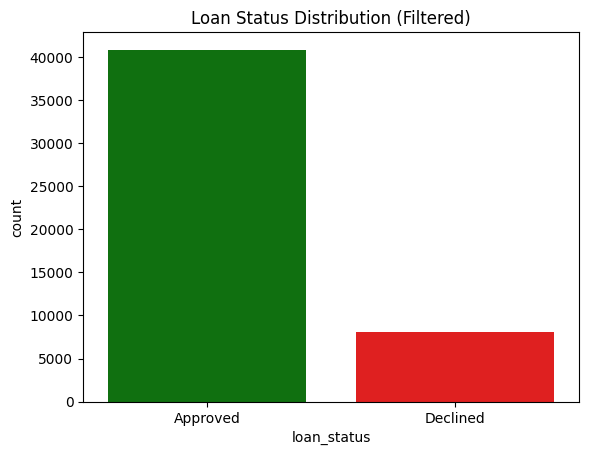

Class imbalance ratio (minority / majority): 0.198


In [332]:
import seaborn as sns
import matplotlib.pyplot as plt

def target_variable_analysis(df):
    print("\n===== TARGET VARIABLE ANALYSIS =====")
    print("Original target distribution:")
    print(df['loan_status'].value_counts())
    
    print("\nFiltering only 'Approved' and 'Declined' for binary classification.")
    df_binary = df[df['loan_status'].isin(['Approved', 'Declined'])].copy()
    print(df_binary['loan_status'].value_counts())
    
    # Visualize
    sns.countplot(data=df_binary, x='loan_status', palette=['green', 'red'])
    plt.title('Loan Status Distribution (Filtered)')
    plt.show()
    
    imbalance_ratio = df_binary['loan_status'].value_counts(normalize=True).min() / \
                      df_binary['loan_status'].value_counts(normalize=True).max()
    print(f"Class imbalance ratio (minority / majority): {imbalance_ratio:.3f}")
    
    return df_binary

# Usage:
df_binary = target_variable_analysis(df)

 ## Missing Values Analysis


===== MISSING VALUES ANALYSIS =====
            Missing Count  Missing %
fraud_type          48974      100.0


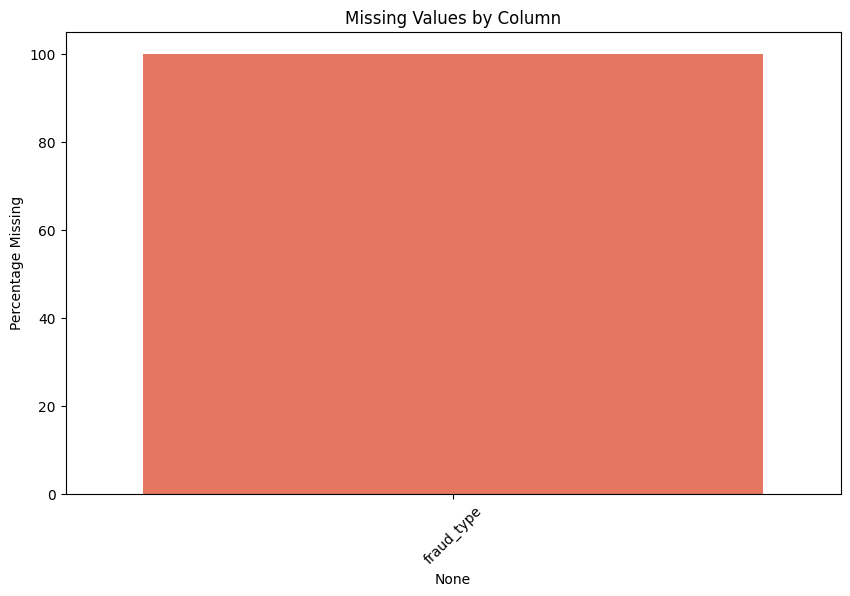

In [333]:
import matplotlib.pyplot as plt
import seaborn as sns

def missing_values_analysis(df_binary):
    print("\n===== MISSING VALUES ANALYSIS =====")
    missing_counts = df_binary.isnull().sum()
    missing_percent = missing_counts / len(df_binary) * 100
    missing_summary = pd.DataFrame({
        'Missing Count': missing_counts,
        'Missing %': missing_percent
    })
    missing_summary = missing_summary[missing_summary['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)
    
    if missing_summary.empty:
        print("No missing values found!")
    else:
        print(missing_summary)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=missing_summary.index, y=missing_summary['Missing %'], palette='Reds')
        plt.xticks(rotation=45)
        plt.ylabel("Percentage Missing")
        plt.title("Missing Values by Column")
        plt.show()

# Usage:
missing_values_analysis(df_binary)


## Duplicate Records Analysis

In [334]:
def duplicate_analysis(df_binary):
    print("\n===== DUPLICATE RECORDS ANALYSIS =====")
    total_duplicates = df.duplicated().sum()
    print(f"Total duplicate rows: {total_duplicates}")
    if total_duplicates > 0:
        print("Sample duplicate rows:")
        print(df[df.duplicated()].head())

# Usage:
duplicate_analysis(df_binary)



===== DUPLICATE RECORDS ANALYSIS =====
Total duplicate rows: 0


## Consistency Checks on Numeric Fields

In [335]:
df_binary['debt_to_income_ratio'] = df_binary['debt_to_income_ratio'] / 100

In [336]:
def data_consistency_analysis(df_binary):
    print("\n===== DATA CONSISTENCY ANALYSIS =====")
    checks = {
        'cibil_score': (300, 900),
        'monthly_income': (0, None),
        'loan_amount_requested': (0, None),
        'applicant_age': (18, 100),
        'existing_emis_monthly': (0, None),
        'number_of_dependents': (0, None),
        'debt_to_income_ratio': (0,1),
        'loan_tenure_months': (1, None),
        'interest_rate_offered': (7, 44)
    }
    for col, (min_v, max_v) in checks.items():
        if col not in df_binary.columns:
            continue
        if min_v is not None and (df_binary[col] < min_v).any():
            print(f"⚠️ {col}: Found values less than minimum allowed value {min_v}")
        if max_v is not None and (df_binary[col] > max_v).any():
            print(f"⚠️ {col}: Found values greater than maximum allowed value {max_v}")
        else:
            print(f"✅ {col}: All values within expected range")

# Usage:
data_consistency_analysis(df_binary)



===== DATA CONSISTENCY ANALYSIS =====
✅ cibil_score: All values within expected range
✅ monthly_income: All values within expected range
✅ loan_amount_requested: All values within expected range
✅ applicant_age: All values within expected range
✅ existing_emis_monthly: All values within expected range
✅ number_of_dependents: All values within expected range
⚠️ debt_to_income_ratio: Found values greater than maximum allowed value 1
✅ loan_tenure_months: All values within expected range
✅ interest_rate_offered: All values within expected range


In [337]:
df_binary.debt_to_income_ratio.describe()

count    48974.000000
mean         0.085654
std          0.095666
min          0.000000
25%          0.030900
50%          0.059500
75%          0.102900
max          1.020000
Name: debt_to_income_ratio, dtype: float64

In [338]:
df_binary[df_binary.debt_to_income_ratio<0.6].count()

application_id               48775
customer_id                  48775
application_date             48775
loan_type                    48775
loan_tenure_months           48775
interest_rate_offered        48775
purpose_of_loan              48775
employment_status            48775
monthly_income               48775
cibil_score                  48775
existing_emis_monthly        48775
debt_to_income_ratio         48775
property_ownership_status    48775
residential_address          48775
applicant_age                48775
gender                       48775
number_of_dependents         48775
loan_amount_requested        48775
fraud_flag                   48775
fraud_type                       0
loan_status                  48775
dtype: int64

In [339]:
df_binary[df_binary.debt_to_income_ratio>0.1].count()

application_id               12753
customer_id                  12753
application_date             12753
loan_type                    12753
loan_tenure_months           12753
interest_rate_offered        12753
purpose_of_loan              12753
employment_status            12753
monthly_income               12753
cibil_score                  12753
existing_emis_monthly        12753
debt_to_income_ratio         12753
property_ownership_status    12753
residential_address          12753
applicant_age                12753
gender                       12753
number_of_dependents         12753
loan_amount_requested        12753
fraud_flag                   12753
fraud_type                       0
loan_status                  12753
dtype: int64

In [340]:
dti = df_binary.groupby('loan_type')['debt_to_income_ratio'].count()
dti

loan_type
Business Loan     9733
Car Loan          9745
Education Loan    9823
Home Loan         9853
Personal Loan     9820
Name: debt_to_income_ratio, dtype: int64

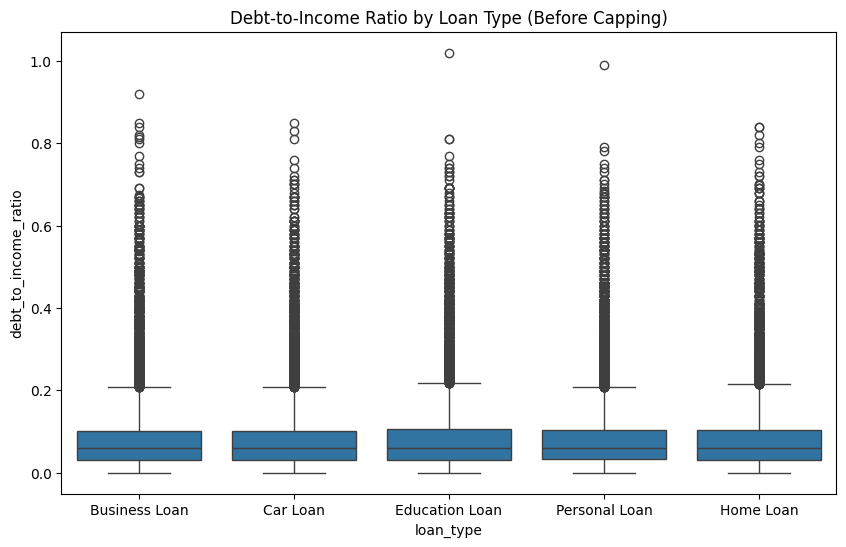

In [341]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df_binary, x='loan_type', y='debt_to_income_ratio')
plt.title('Debt-to-Income Ratio by Loan Type (Before Capping)')
plt.show()


## Outlier Detection (IQR Method)

In [342]:
def detect_outliers_iqr(df_binary, numerical_cols):
    print("\n===== OUTLIER DETECTION (IQR METHOD) =====")
    for col in numerical_cols:
        Q1 = df_binary[col].quantile(0.25)
        Q3 = df_binary[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df_binary[(df_binary[col] < lower_bound) | (df_binary[col] > upper_bound)]
        count_outliers = len(outliers)
        perc_outliers = 100 * count_outliers / len(df_binary)
        print(f"{col}: {count_outliers} outliers ({perc_outliers:.2f}%)")

# Usage:
numerical_cols = [
    'loan_tenure_months', 'interest_rate_offered', 'monthly_income',
    'cibil_score', 'existing_emis_monthly', 'debt_to_income_ratio',
    'applicant_age', 'number_of_dependents', 'loan_amount_requested'
]
detect_outliers_iqr(df_binary, numerical_cols)



===== OUTLIER DETECTION (IQR METHOD) =====
loan_tenure_months: 0 outliers (0.00%)
interest_rate_offered: 160 outliers (0.33%)
monthly_income: 184 outliers (0.38%)
cibil_score: 309 outliers (0.63%)
existing_emis_monthly: 157 outliers (0.32%)
debt_to_income_ratio: 3881 outliers (7.92%)
applicant_age: 0 outliers (0.00%)
number_of_dependents: 0 outliers (0.00%)
loan_amount_requested: 149 outliers (0.30%)


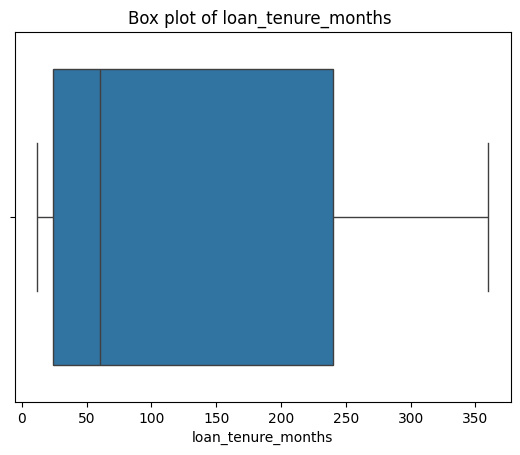

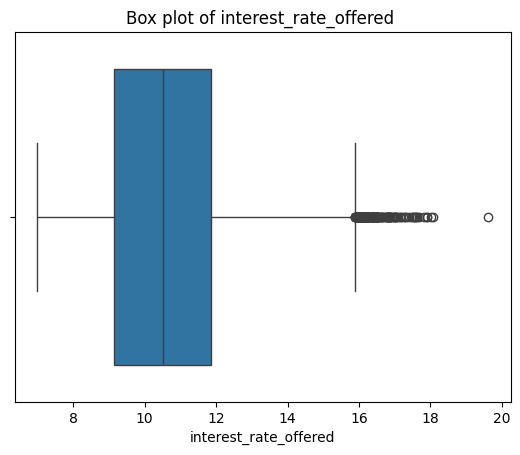

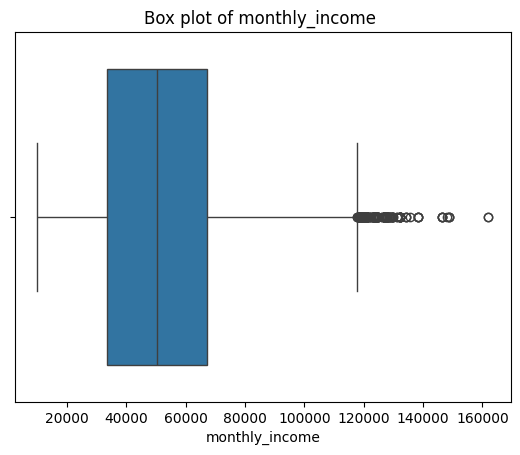

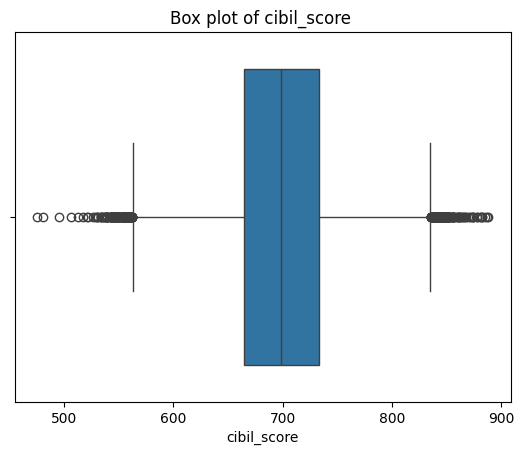

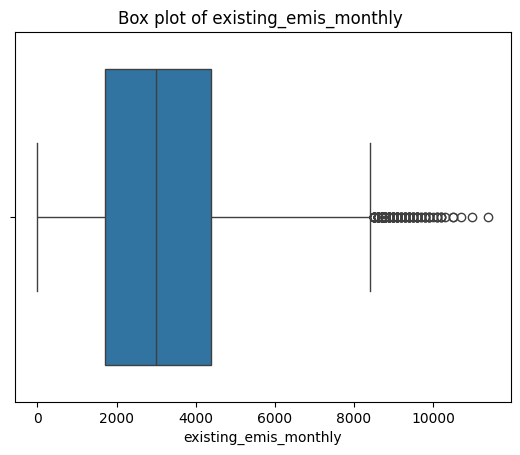

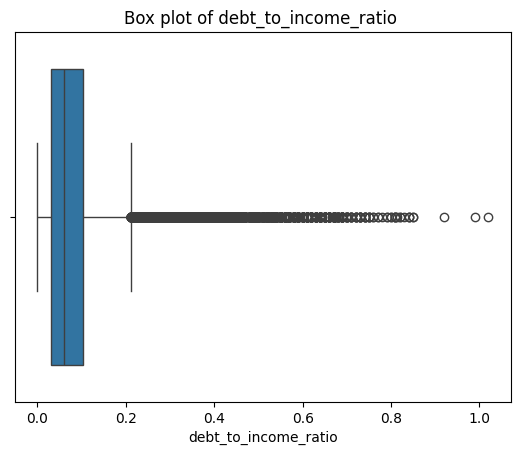

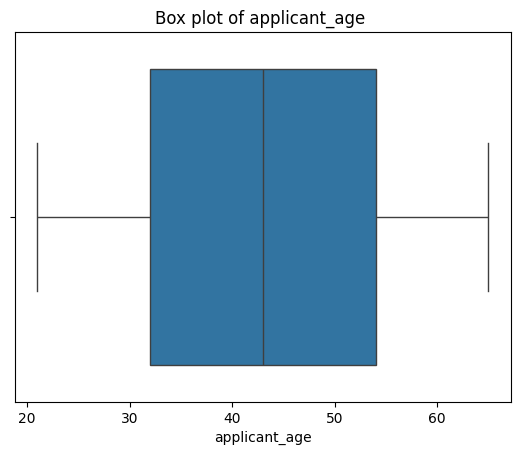

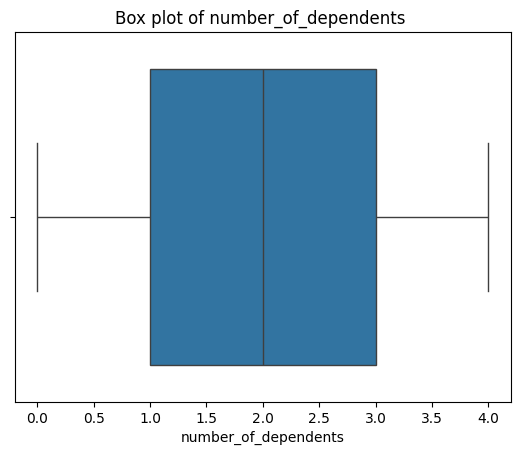

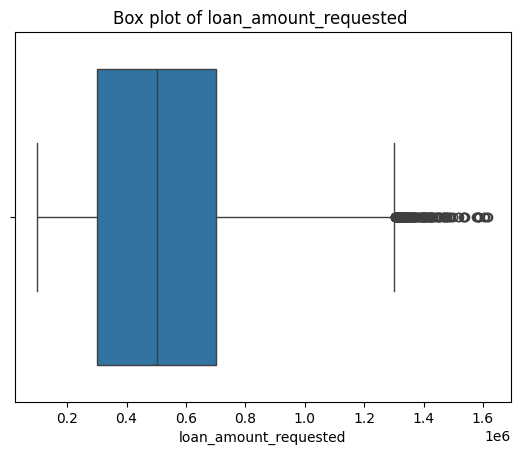

In [343]:
# Verify the changes with box plots
for col in [
    'loan_tenure_months', 'interest_rate_offered', 'monthly_income',
    'cibil_score', 'existing_emis_monthly', 'debt_to_income_ratio',
    'applicant_age', 'number_of_dependents', 'loan_amount_requested'
    ]:
    sns.boxplot(x=df_binary[col])
    plt.title(f'Box plot of {col} ')
    plt.show()

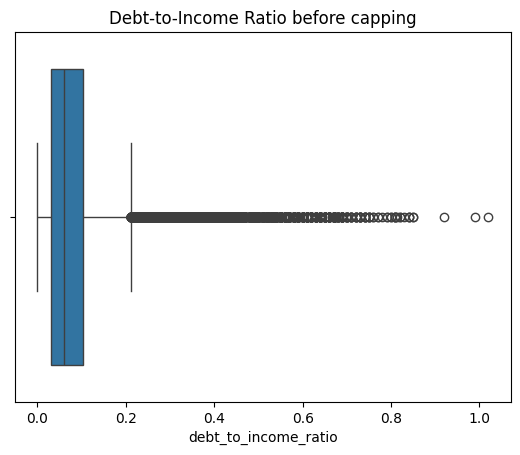

In [344]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df_binary['debt_to_income_ratio'])
plt.title('Debt-to-Income Ratio before capping')
plt.show()


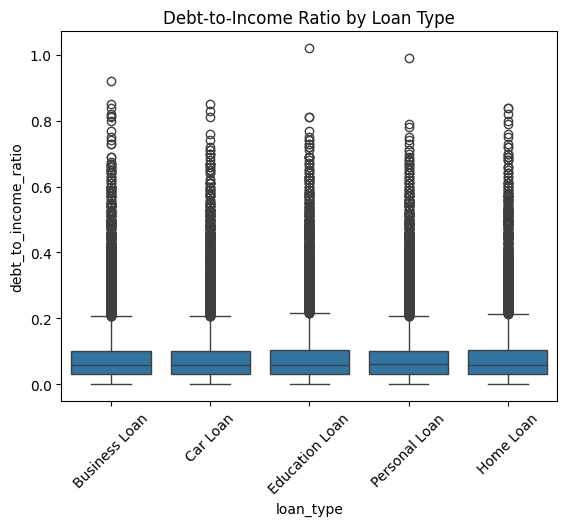

In [345]:
sns.boxplot(x='loan_type', y='debt_to_income_ratio', data=df_binary)
plt.xticks(rotation=45)
plt.title('Debt-to-Income Ratio by Loan Type')
plt.show()


## Categorical Features Distribution


===== CATEGORICAL FEATURES ANALYSIS =====

Feature: loan_type
loan_type
Home Loan         9853
Education Loan    9823
Personal Loan     9820
Car Loan          9745
Business Loan     9733
Name: count, dtype: int64


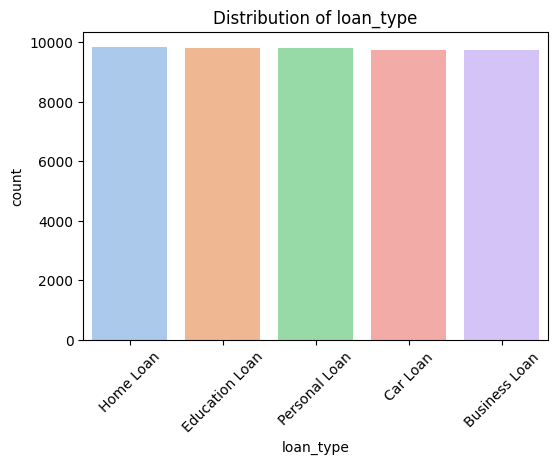


Feature: purpose_of_loan
purpose_of_loan
Home Renovation       7042
Medical Emergency     7023
Wedding               7022
Debt Consolidation    7017
Business Expansion    6999
Education             6976
Vehicle Purchase      6895
Name: count, dtype: int64


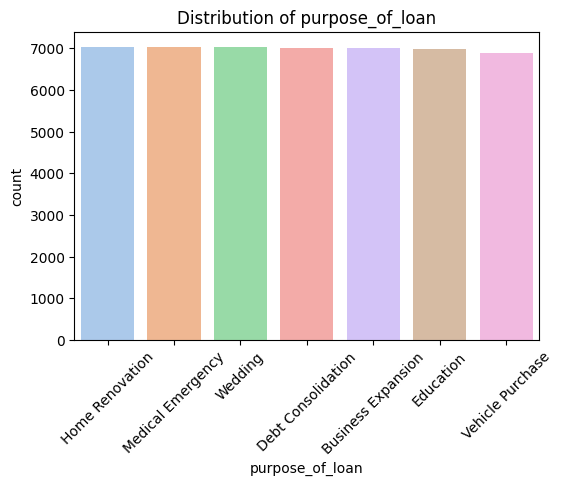


Feature: employment_status
employment_status
Retired           8383
Salaried          8321
Unemployed        8172
Business Owner    8114
Self-Employed     8044
Student           7940
Name: count, dtype: int64


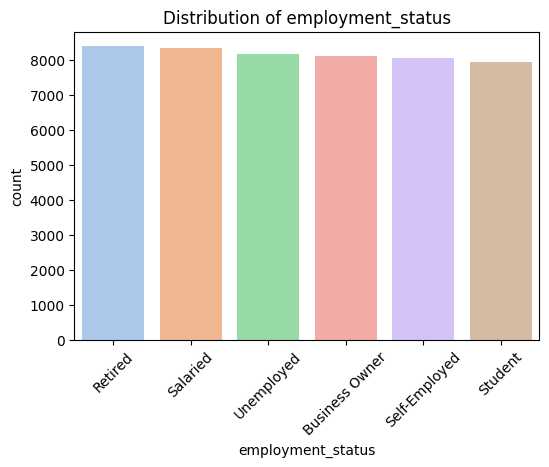


Feature: property_ownership_status
property_ownership_status
Jointly Owned    16378
Rented           16333
Owned            16263
Name: count, dtype: int64


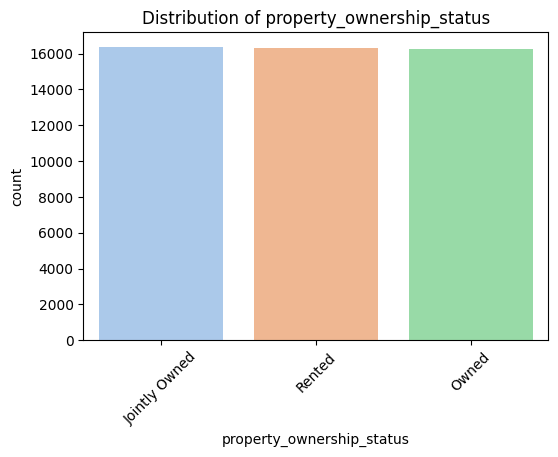


Feature: gender
gender
Other     16566
Female    16348
Male      16060
Name: count, dtype: int64


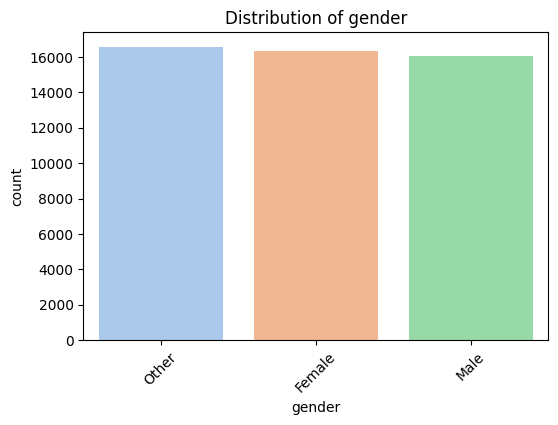

In [346]:
def categorical_features_analysis(df_binary, categorical_cols):
    print("\n===== CATEGORICAL FEATURES ANALYSIS =====")
    for col in categorical_cols:
        print(f"\nFeature: {col}")
        print(df_binary[col].value_counts())
        plt.figure(figsize=(6,4))
        sns.countplot(data=df_binary, x=col, order=df_binary[col].value_counts().index, palette='pastel')
        plt.xticks(rotation=45)
        plt.title(f'Distribution of {col}')
        plt.show()

# Usage:
categorical_cols = ['loan_type', 'purpose_of_loan', 'employment_status', 'property_ownership_status', 'gender']
categorical_features_analysis(df_binary, categorical_cols)


## Numerical Features Distribution


===== NUMERICAL FEATURES ANALYSIS =====
       loan_tenure_months  interest_rate_offered  monthly_income  \
count        48974.000000           48974.000000    48974.000000   
mean           121.396904              10.528949    50851.676400   
std            121.383680               1.927317    23847.320662   
min             12.000000               7.000000    10000.000000   
25%             24.000000               9.150000    33600.000000   
50%             60.000000              10.510000    50400.000000   
75%            240.000000              11.850000    67300.000000   
max            360.000000              19.620000   162000.000000   

        cibil_score  existing_emis_monthly  debt_to_income_ratio  \
count  48974.000000           48974.000000          48974.000000   
mean     699.141851            3066.535304              0.085654   
std       49.908767            1897.666534              0.095666   
min      476.000000               0.000000              0.000000   
25%   

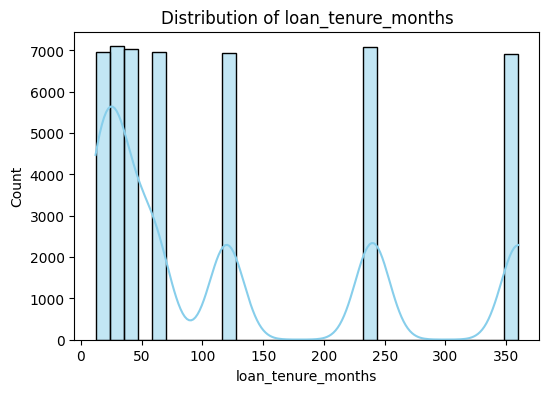

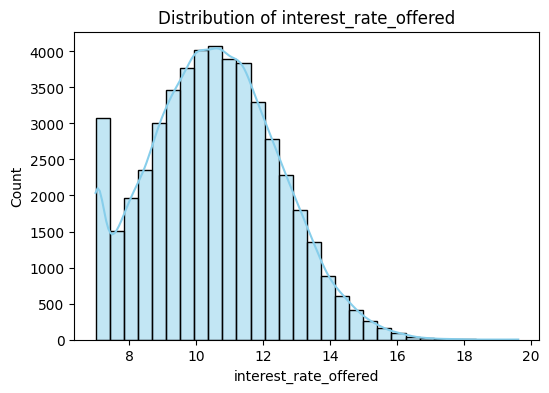

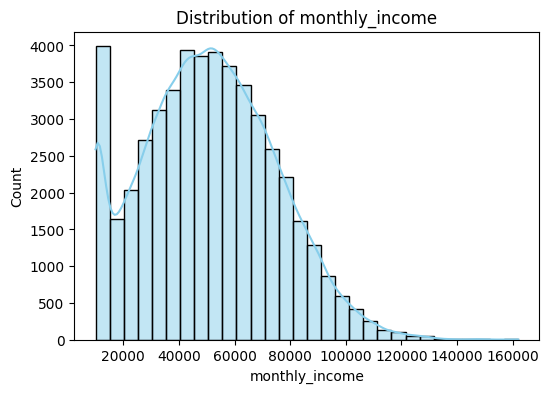

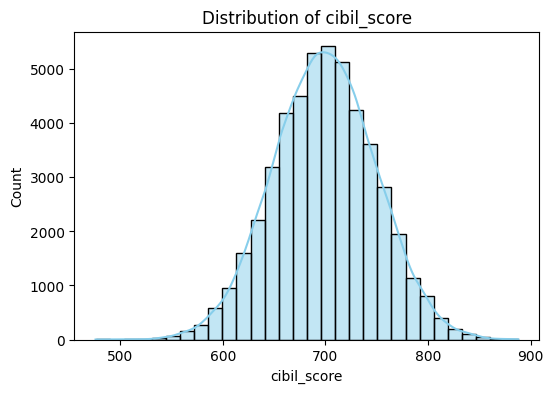

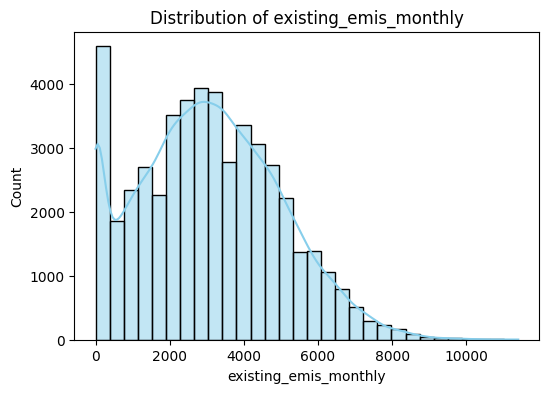

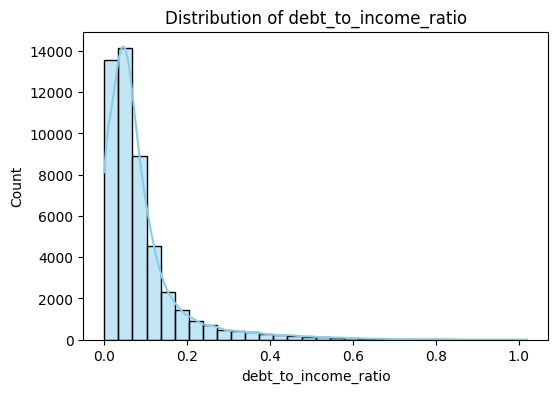

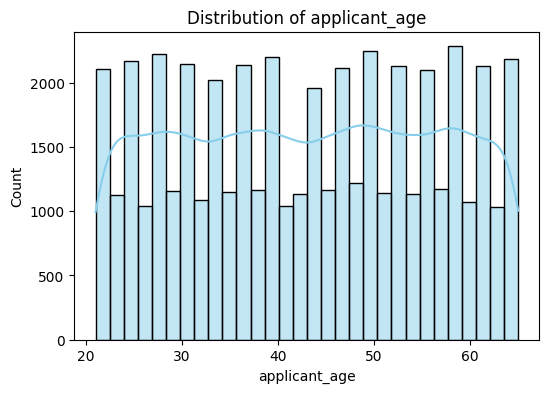

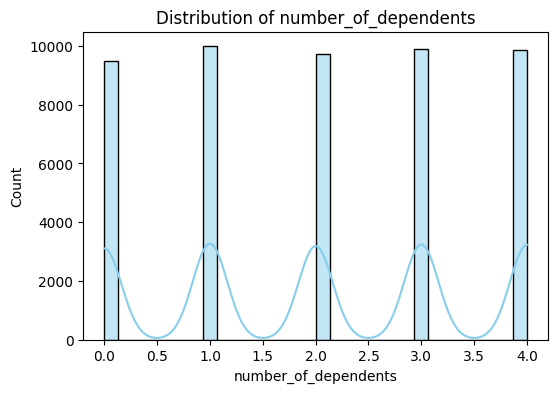

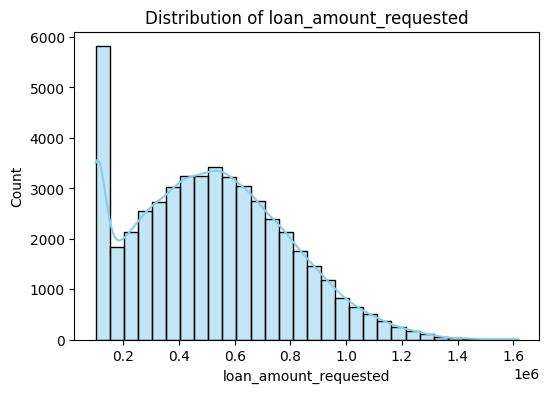

In [347]:
def numerical_features_analysis(df_binary, numerical_cols):
    print("\n===== NUMERICAL FEATURES ANALYSIS =====")
    print(df_binary[numerical_cols].describe())
    for col in numerical_cols:
        plt.figure(figsize=(6,4))
        sns.histplot(df_binary[col], bins=30, kde=True, color="skyblue")
        plt.title(f'Distribution of {col}')
        plt.show()

# Usage:
numerical_features = [
    'loan_tenure_months', 'interest_rate_offered', 'monthly_income',
    'cibil_score', 'existing_emis_monthly', 'debt_to_income_ratio',
    'applicant_age', 'number_of_dependents', 'loan_amount_requested'
]
numerical_features_analysis(df_binary, numerical_features)


## Correlation Analysis (Numerical Features)


===== CORRELATION ANALYSIS =====


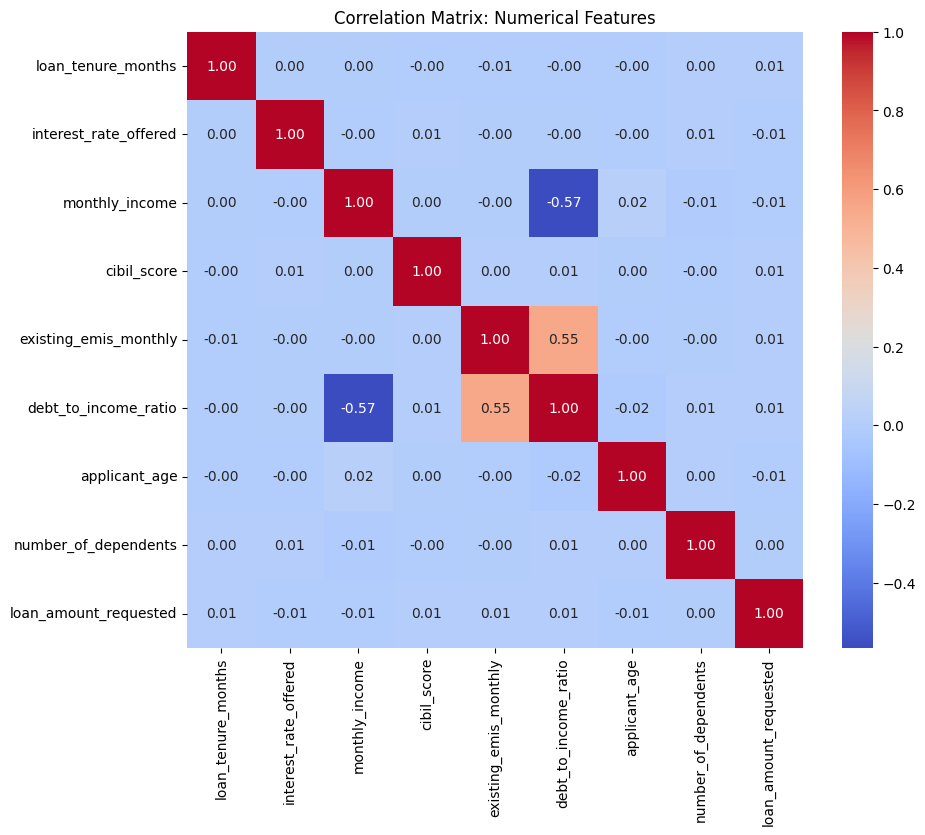


High correlations (|corr|>0.5, not including self):
monthly_income vs debt_to_income_ratio: -0.57
existing_emis_monthly vs debt_to_income_ratio: 0.55


In [348]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def correlation_analysis(df_binary, numerical_cols):
    print("\n===== CORRELATION ANALYSIS =====")
    corr = df_binary[numerical_cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Correlation Matrix: Numerical Features')
    plt.show()
    # Print high correlations (absolute > 0.5, not counting self)
    print("\nHigh correlations (|corr|>0.5, not including self):")
    high_corrs = []
    for i in range(len(corr.columns)):
        for j in range(i+1, len(corr.columns)):
            val = corr.iloc[i,j]
            if abs(val) > 0.5:
                print(f"{corr.columns[i]} vs {corr.columns[j]}: {val:.2f}")

# Usage:
correlation_analysis(df_binary, numerical_features)


## Multicolinearity check


In [349]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df_binary[['monthly_income', 'existing_emis_monthly', 'debt_to_income_ratio']]
X = add_constant(X)

vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


                 feature        VIF
0                  const  12.037960
1         monthly_income   1.840501
2  existing_emis_monthly   1.797432
3   debt_to_income_ratio   2.640532


## Numerical Features vs Target Variable


===== NUMERICAL FEATURES vs TARGET DISTRIBUTION =====


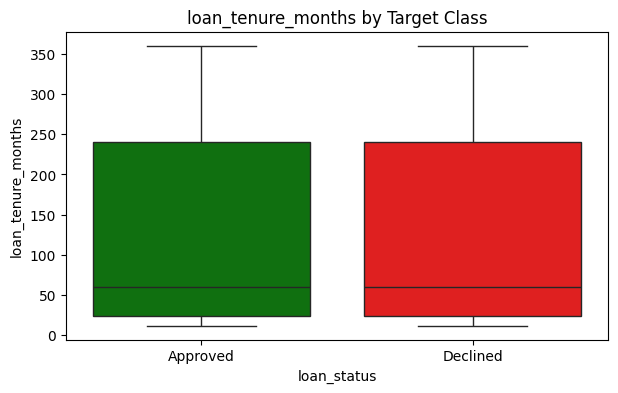

loan_tenure_months means by class:
loan_status
Approved    121.496698
Declined    120.892734
Name: loan_tenure_months, dtype: float64



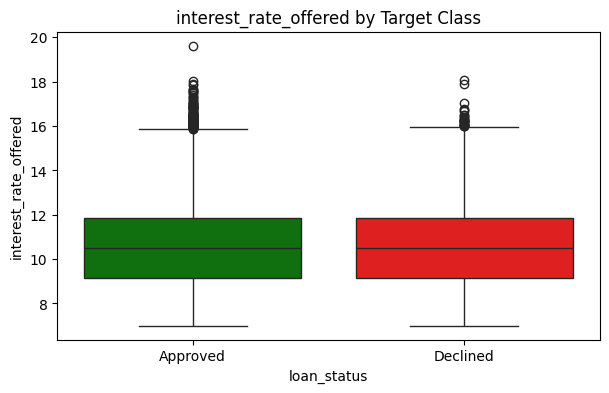

interest_rate_offered means by class:
loan_status
Approved    10.529279
Declined    10.527280
Name: interest_rate_offered, dtype: float64



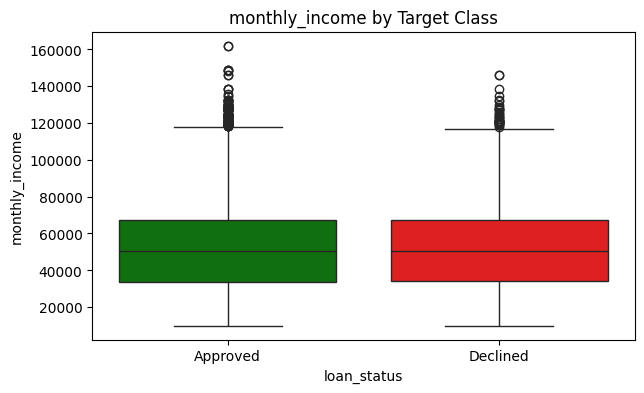

monthly_income means by class:
loan_status
Approved    50807.771146
Declined    51073.492338
Name: monthly_income, dtype: float64



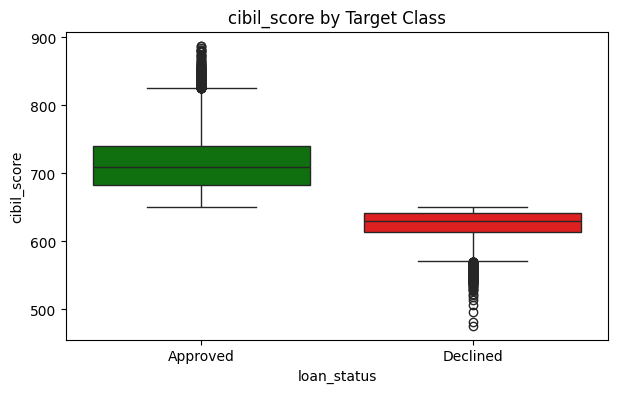

cibil_score means by class:
loan_status
Approved    713.987207
Declined    624.140880
Name: cibil_score, dtype: float64



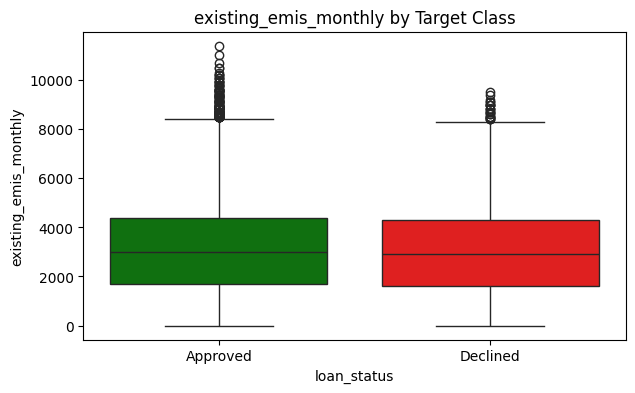

existing_emis_monthly means by class:
loan_status
Approved    3074.463089
Declined    3026.482946
Name: existing_emis_monthly, dtype: float64



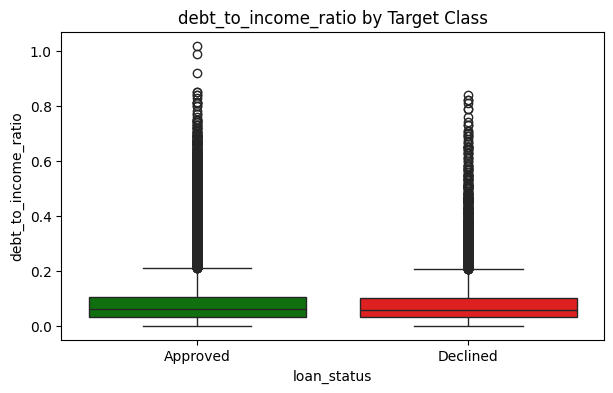

debt_to_income_ratio means by class:
loan_status
Approved    0.085984
Declined    0.083985
Name: debt_to_income_ratio, dtype: float64



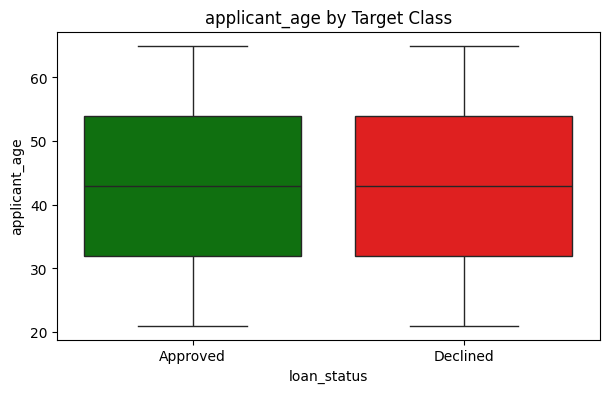

applicant_age means by class:
loan_status
Approved    43.059024
Declined    43.015200
Name: applicant_age, dtype: float64



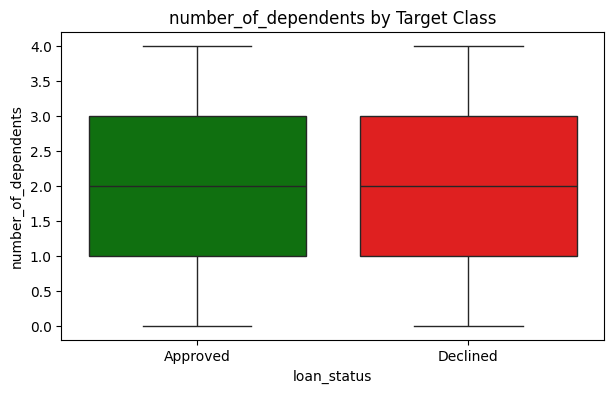

number_of_dependents means by class:
loan_status
Approved    2.011717
Declined    2.020267
Name: number_of_dependents, dtype: float64



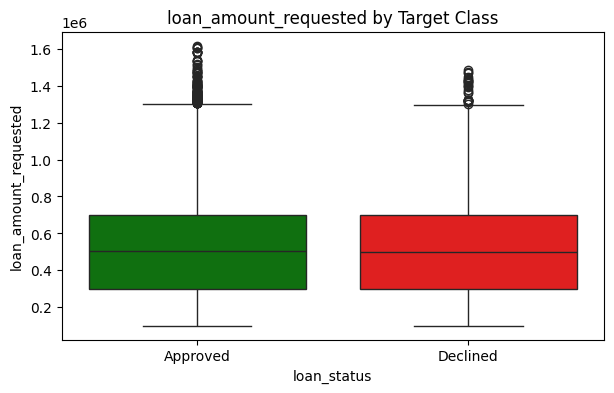

loan_amount_requested means by class:
loan_status
Approved    514625.727704
Declined    511739.001483
Name: loan_amount_requested, dtype: float64



In [350]:
def numerics_vs_target(df, numerical_cols, target_col='loan_status'):
    print("\n===== NUMERICAL FEATURES vs TARGET DISTRIBUTION =====")
    for col in numerical_cols:
        plt.figure(figsize=(7,4))
        sns.boxplot(data=df, x=target_col, y=col, palette=['green', 'red'])
        plt.title(f'{col} by Target Class')
        plt.show()
        # Optionally print stats
        means = df.groupby(target_col)[col].mean()
        print(f"{col} means by class:")
        print(means)
        print()

# Usage:
numerics_vs_target(df_binary, numerical_features)


## Categorical Features vs Target Variable


===== CATEGORICAL FEATURES vs TARGET (%) =====

loan_type (distribution % by class):
loan_status     Approved  Declined
loan_type                         
Business Loan       83.5      16.5
Car Loan            83.7      16.3
Education Loan      83.4      16.6
Home Loan           83.4      16.6
Personal Loan       83.4      16.6


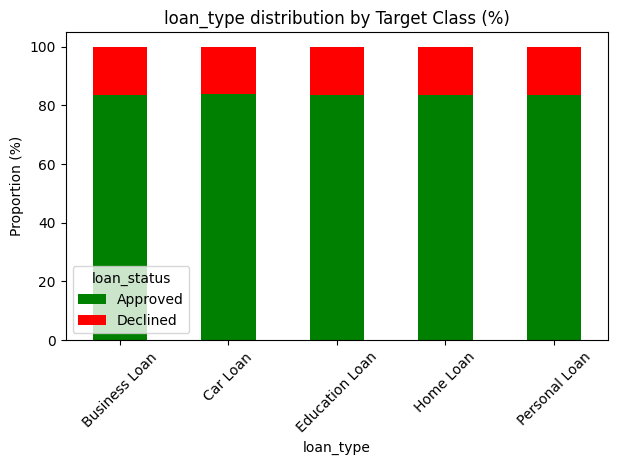


purpose_of_loan (distribution % by class):
loan_status         Approved  Declined
purpose_of_loan                       
Business Expansion      83.4      16.6
Debt Consolidation      84.2      15.8
Education               83.0      17.0
Home Renovation         83.5      16.5
Medical Emergency       84.2      15.8
Vehicle Purchase        82.9      17.1
Wedding                 83.2      16.8


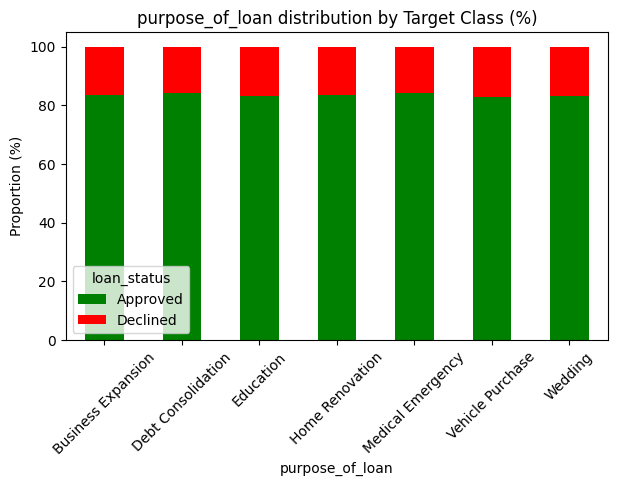


employment_status (distribution % by class):
loan_status        Approved  Declined
employment_status                    
Business Owner         83.2      16.8
Retired                83.6      16.4
Salaried               83.3      16.7
Self-Employed          83.2      16.8
Student                83.5      16.5
Unemployed             84.0      16.0


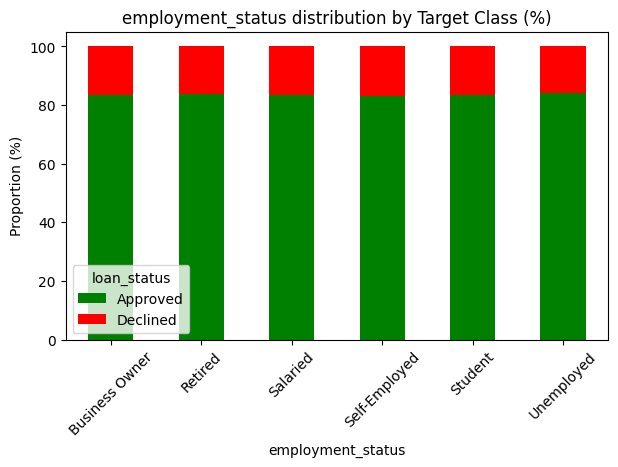


property_ownership_status (distribution % by class):
loan_status                Approved  Declined
property_ownership_status                    
Jointly Owned                  83.5      16.5
Owned                          83.4      16.6
Rented                         83.5      16.5


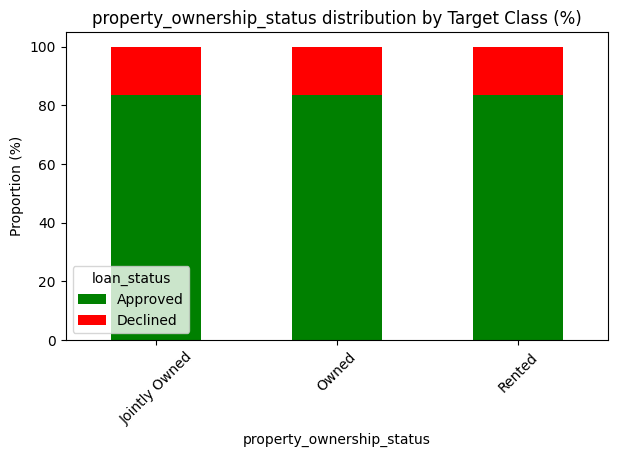


gender (distribution % by class):
loan_status  Approved  Declined
gender                         
Female           83.3      16.7
Male             83.8      16.2
Other            83.3      16.7


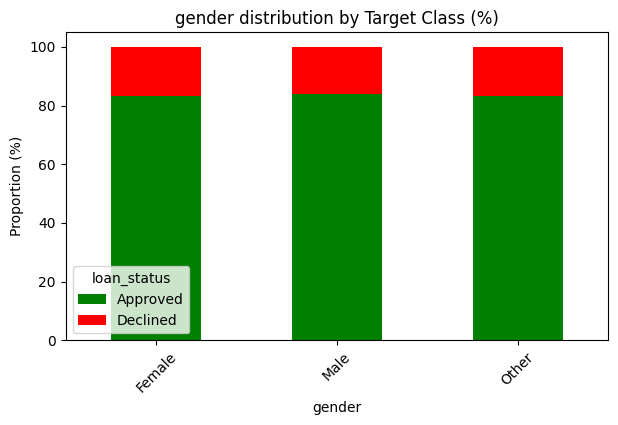

In [351]:
def categoricals_vs_target(df, categorical_cols, target_col='loan_status'):
    print("\n===== CATEGORICAL FEATURES vs TARGET (%) =====")
    for col in categorical_cols:
        ctab = pd.crosstab(df[col], df[target_col], normalize='index') * 100
        print(f"\n{col} (distribution % by class):\n{ctab.round(1)}")
        ctab.plot(kind='bar', stacked=True, figsize=(7,4), color=['green', 'red'])
        plt.title(f'{col} distribution by Target Class (%)')
        plt.ylabel('Proportion (%)')
        plt.xticks(rotation=45)
        plt.show()

# Usage:
categoricals_vs_target(df_binary, categorical_cols)


## Save Filtered Data for Modeling

In [352]:
import os

def save_filtered_data(df, save_path):
    # Make sure parent directory exists
    dir_name = os.path.dirname(save_path)
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)
        print(f"Created directory: {dir_name}")

    df.to_csv(save_path, index=False)
    print(f"Filtered binary-class dataset saved to {save_path}")

save_filtered_data(df_binary, "data/filtered_loan_application.csv")


Filtered binary-class dataset saved to data/filtered_loan_application.csv
